In [23]:
import Pkg
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("DataFrames")
Pkg.add("Statistics")

using Random
Random.seed!(13)

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


MersenneTwister(UInt32[0x0000000d], Random.DSFMT.DSFMT_state(Int32[1942364238, 1073583280, 1215809738, 1073453074, -1714420386, 1073447762, -356802344, 1073021814, -1864483401, 1072881260  …  -56294547, 1072963348, 654307797, 1073646794, 598513278, -416580782, 1018899645, 745312242, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], UInt128[0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000  …  0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x000000000000

In [24]:
using Statistics, LinearAlgebra, DataFrames, Plots, StatsPlots, CSV

In [25]:
# using Pkg
# Pkg.add("StatsBase")
using StatsBase
using Dates

In [26]:
rides = CSV.read("rideshare_kaggle.csv")

,id,timestamp,hour,day,month,datetime
,String,Float64,Int64,Int64,Int64,String
1,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.54495e9,9,16,12,2018-12-16 09:30:07
2,4bd23055-6827-41c6-b23b-3c491f24e74d,1.54328e9,2,27,11,2018-11-27 02:00:23
3,981a3613-77af-4620-a42a-0c0866077d1e,1.54337e9,1,28,11,2018-11-28 01:00:22
4,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.54355e9,4,30,11,2018-11-30 04:53:02
5,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.54346e9,3,29,11,2018-11-29 03:49:20
6,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,1.54507e9,18,17,12,2018-12-17 18:25:12
7,462816a3-820d-408b-8549-0b39e82f65ac,1.54321e9,5,26,11,2018-11-26 05:03:00
8,474d6376-bc59-4ec9-bf57-4e6d6faeb165,1.54378e9,19,2,12,2018-12-02 19:53:04
9,4f9fee41-fde3-4767-bbf1-a00e108701fb,1.54382e9,6,3,12,2018-12-03 06:28:02


In [27]:
for x in names(rides)
    rides = rides[.!((rides[:,x]) .== "NA"), :];
end

In [28]:
rides[!,:new_name] .= "tmp"
for x in 1:size(rides, 1)
    if rides[x,:name] == "Taxi"
        rides[x, :new_name] = "Taxi"
    elseif rides[x, :name] == "Shared" || rides[x, :name] == "UberPool"
        rides[x, :new_name] = "Shared Rides"
    elseif rides[x, :name] == "Lyft" || rides[x, :name] == "UberX"
        rides[x, :new_name] = "Basic"
    elseif rides[x, :name] == "Lux Black" || rides[x, :name] == "Black SUV"
        rides[x, :new_name] = "Black"
    elseif rides[x, :name] == "Lyft XL" || rides[x, :name] == "UberXL"
        rides[x, :new_name] = "XL"
    elseif rides[x, :name] == "Lux Black XL"
        rides[x, :new_name] = "Lux Black XL"
    elseif rides[x, :name] == "WAV"
        rides[x, :new_name] = "WAV"
    elseif rides[x, :name] == "Lux"
        rides[x, :new_name] = "Lux"
    end
end

In [29]:
rides[:price] = [parse(Float32,x) for x in rides[:price]] 

637976-element Array{Float32,1}:
  5.0
 11.0
  7.0
 26.0
  9.0
 16.5
 10.5
 16.5
  3.0
 27.5
 13.5
  7.0
 12.0
  ⋮
 17.0
 22.0
 14.0
 15.0
 15.0
 27.0
 17.0
  9.5
 13.0
  9.5
 27.0
 10.0

In [30]:
rides[:day_of_week] = rides[:id]
for x in 1:size(rides,1)
    t = Date(2018, rides[x,:month], rides[x, :day])
    rides[x,:day_of_week] = Dates.dayname(t);
end

rides[:,:day_of_week]

637976-element Array{String,1}:
 "Sunday"
 "Tuesday"
 "Wednesday"
 "Friday"
 "Thursday"
 "Monday"
 "Monday"
 "Sunday"
 "Monday"
 "Tuesday"
 "Friday"
 "Wednesday"
 "Friday"
 ⋮
 "Thursday"
 "Thursday"
 "Sunday"
 "Sunday"
 "Sunday"
 "Sunday"
 "Sunday"
 "Saturday"
 "Saturday"
 "Saturday"
 "Saturday"
 "Saturday"

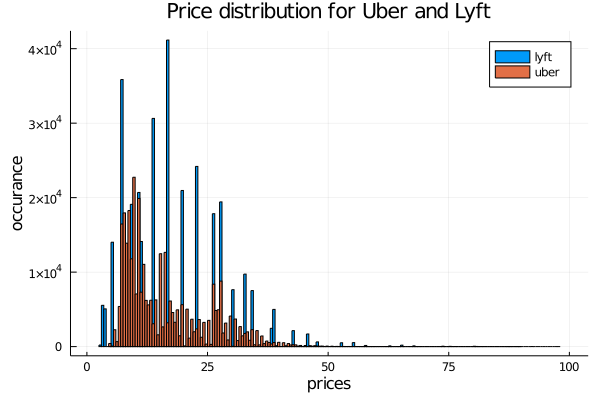

In [31]:
@df rides histogram(:price, group=:cab_type, label=["lyft" "uber"], 
    title = "Price distribution for Uber and Lyft")
ylabel!("occurance")
xlabel!("prices")

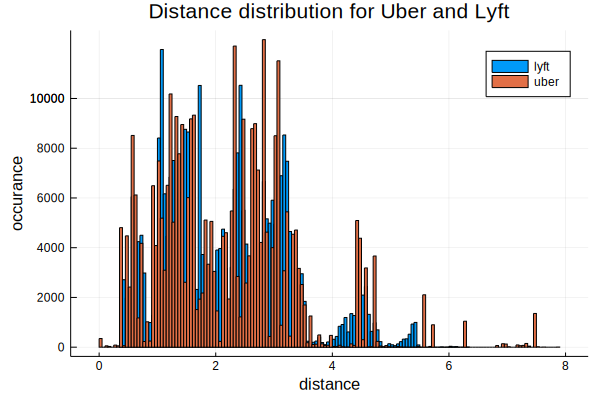

In [50]:
@df rides histogram(:distance, group=:cab_type, label=["lyft" "uber"], 
    title = "Distance distribution for Uber and Lyft")
ylabel!("occurance")
xlabel!("distance")

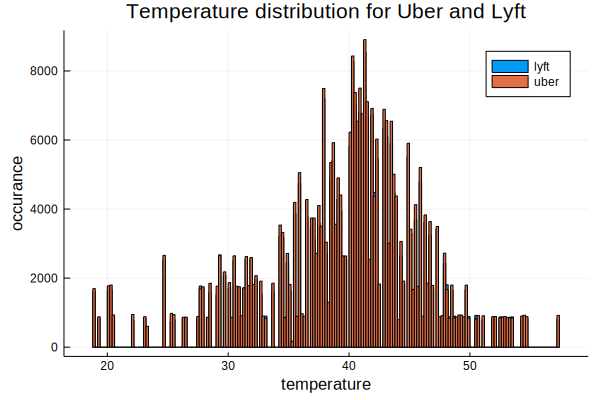

In [62]:
@df rides histogram(:temperature, group=:cab_type, label=["lyft" "uber"], 
    title = "Temperature distribution for Uber and Lyft")
ylabel!("occurance")
xlabel!("temperature")

Standardize the values of real features

In [32]:
labels = [
    :price
    :distance
    :temperature
    :windSpeed
    :humidity
    :visibility
]
for x in labels
    X = rides[:, x]
    dt = fit(ZScoreTransform, X, dims=1)
    rides[:, x] = StatsBase.transform(dt, X)
end

In [33]:
maximum(rides[:price])

8.682085f0

Create train/test split

In [34]:
#rides = rides[.!(ismissing.(rides[!, :price])), :]; # only consider the examples for which the price is known(just in case not cleaned)
rides = rides[shuffle(1:end), :] # we shuffle the data so that our train/test split will be truly random
feature_names = names(rides) # names of all feature
 
train_proportion = 0.8
n = size(rides, 1) #number of data
println("Size of dataset: ", string(n))

# Put the first ntrain observations in the DataFrame rides into the training set, and the rest into the test set
ntrain = convert(Int, round(train_proportion*n))

target = rides[:, :price]
data = rides[:, filter(col -> (col != :price), feature_names)]

# the following variable records the features of examples in the training set
train_x = data[1:ntrain,:]
# the following variable records the features of examples in the test set
test_x = data[ntrain+1:n,:]
# the following variable records the labels of examples in the training set
train_y = target[1:ntrain,:]
# the following variable records the labels of examples in the test set
test_y = target[ntrain+1:n,:]

train_x

Size of dataset: 637976


,id,timestamp,hour,day,month,datetime,timezone
,String,Float64,Int64,Int64,Int64,String,String
1,Wednesday,1.54341e9,11,28,11,2018-11-28 11:53:07,America/New_York
2,Saturday,1.54489e9,14,15,12,2018-12-15 14:45:15,America/New_York
3,Sunday,1.54379e9,23,2,12,2018-12-02 23:13:01,America/New_York
4,Tuesday,1.54329e9,3,27,11,2018-11-27 03:39:22,America/New_York
5,Sunday,1.54498e9,17,16,12,2018-12-16 17:15:14,America/New_York
6,Saturday,1.54369e9,19,1,12,2018-12-01 19:03:01,America/New_York
7,Tuesday,1.54511e9,6,18,12,2018-12-18 06:20:05,America/New_York
8,Friday,1.5436e9,17,30,11,2018-11-30 17:42:56,America/New_York
9,Monday,1.54506e9,14,17,12,2018-12-17 14:25:11,America/New_York


First look at real valued features

In [35]:
labels_real = [
    :distance
    :temperature
    :windSpeed
    :humidity
    :visibility
]

5-element Array{Symbol,1}:
 :distance
 :temperature
 :windSpeed
 :humidity
 :visibility

In [36]:
# the following variable should have as many columns as real variables, and as many rows as examples in the training set      
train_vals_real = convert(Matrix,train_x[:,labels_real])
# the following variable should have as many columns as real variables, and as many rows as examples in the test set      
test_vals_real = convert(Matrix,test_x[:,labels_real])

127595×5 Array{Float64,2}:
 -0.809627    0.976521  -0.202295  -0.657086   0.588363
  0.0887245   0.19591   -0.91389   -0.729249   0.540704
 -0.016964    2.04559    0.359992  -1.73953    0.588363
  0.714048    0.255385  -1.15532    1.36348   -1.91949
 -0.016964    0.583985  -1.09814    1.36348   -0.902512
  1.94708     0.26282    0.985815  -1.0179     0.588363
 -0.193111    0.650895  -0.224532  -0.440597   0.588363
 -0.994582   -1.32963   -1.20298   -0.657086   0.588363
  1.93827     0.192936   0.642725  -0.440597   0.588363
  0.414597   -0.245693  -1.23792   -0.224108   0.482284
 -0.818434   -1.13039   -1.3364    -0.945738   0.588363
  0.846158   -2.43735   -0.713754  -2.02818    0.588363
 -0.510177    1.03154    0.159856   1.43564   -2.43989
  ⋮                                           
  0.714048    0.85311    0.220215   0.714012   0.588363
 -1.54064     0.798096   0.506124   0.858338   0.0798746
 -0.016964    2.04559    0.359992  -1.73953    0.588363
 -1.29403     0.87244    0.2170

Produce our training features, use the real valued features with an offset. 

In [37]:
Xtrain_real = hcat(train_vals_real, ones(ntrain))
Xtest_real = hcat(test_vals_real, ones(n-ntrain))

127595×6 Array{Float64,2}:
 -0.809627    0.976521  -0.202295  -0.657086   0.588363   1.0
  0.0887245   0.19591   -0.91389   -0.729249   0.540704   1.0
 -0.016964    2.04559    0.359992  -1.73953    0.588363   1.0
  0.714048    0.255385  -1.15532    1.36348   -1.91949    1.0
 -0.016964    0.583985  -1.09814    1.36348   -0.902512   1.0
  1.94708     0.26282    0.985815  -1.0179     0.588363   1.0
 -0.193111    0.650895  -0.224532  -0.440597   0.588363   1.0
 -0.994582   -1.32963   -1.20298   -0.657086   0.588363   1.0
  1.93827     0.192936   0.642725  -0.440597   0.588363   1.0
  0.414597   -0.245693  -1.23792   -0.224108   0.482284   1.0
 -0.818434   -1.13039   -1.3364    -0.945738   0.588363   1.0
  0.846158   -2.43735   -0.713754  -2.02818    0.588363   1.0
 -0.510177    1.03154    0.159856   1.43564   -2.43989    1.0
  ⋮                                                       ⋮
  0.714048    0.85311    0.220215   0.714012   0.588363   1.0
 -1.54064     0.798096   0.506124   0.858338 

Fit the linear model, compute and print the MSE, and plot the predicted versus the real data. 

In [38]:
"""This function just computes the mean squared error."""
function MSE(y, pred)
    return mean((y - pred).^2)
end

"""This function plots the main diagonal; 
for a "predicted vs true" plot with perfect predictions,
all data lies on this line"""
function plotDiagonal(xmin, xmax)
    xsamples = [xmin, xmax]
    plot!(xsamples, xsamples, color=:black)
end

"""This helper funciton plots x vs, y and labels the axes."""
function plotdata(x,y,xname, yname; margin=.05, plotDiag=true, zeromin=false,data_label="data")
    scatter(x,y, label=data_label)
    xlabel!(xname)
    ylabel!(yname)
    range_y = maximum(y) - minimum(y)
    range_x = maximum(x) - minimum(x)
    if plotDiag
        plotDiagonal(minimum(x)-margin*range_x, maximum(x)+margin*range_x)
    end
    if zeromin
        ylims!((0.0,maximum(y)+margin*range_y))
        xlims!((0.0,maximum(x)+margin*range_x))
    else
        ylims!((minimum(y)-margin*range_y,maximum(y)+margin*range_y))
        xlims!((minimum(x)-margin*range_x,maximum(x)+margin*range_x))
    end
end

"""This function plots the predicted labels vs the actual labels
(We only plots the first 10000 points to avoid slow plots.)"""
function plot_pred_true(test_pred, test_y, max_points = 10000)
    plotdata(test_pred[1:max_points], test_y[1:max_points], "Predicted (\$)", "True (\$)", zeromin=true)
end

plot_pred_true

In [24]:
# The weights of the linear equation (compute via least squares)
w = Xtrain_real\train_y
print("weights when only considering real valued features: ", '\n',w)

train_pred = Xtrain_real*w
test_pred = Xtest_real*w

train_MSE = MSE(train_y,train_pred)
test_MSE = MSE(test_y,test_pred)

weights when only considering real valued features: 
[0.3460778392056164; -0.00018570428440778692; 0.00028140506540973474; -7.389861455729411e-6; -0.00029504197504546696; 0.00044102593274141395]

0.8778718709763312

MSE of train dataset and test dataset:

Train MSE	0.8816984373814963
Test MSE 	0.8778718709763312


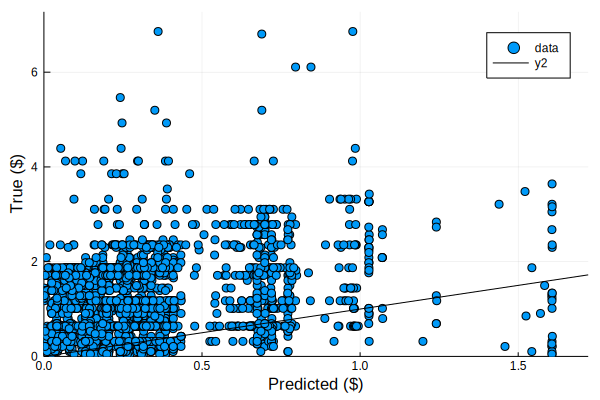

In [25]:
println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)

plot_pred_true(test_pred, test_y)

Add in boolean and categorical data

In [40]:
cat_labels = [
  :new_name
  :cab_type
    :day_of_week
]

cats_sets = [unique(train_x[:, label]) for label in cat_labels]
function onehot(column, cats=unique(column))
    result = zeros(size(column, 1), size(cats,1))
    for i in 1:size(column, 1)
        for j in 1:size(cats,1)
            if column[i] == cats[j]
                result[i,j] = 1
            end
        end
    end
    result
end

train_cat_vals = hcat([onehot(train_x[:, cat_labels[i]], cats_sets[i]) for i in 1:size(cat_labels, 1)]...)
test_cat_vals = hcat([onehot(test_x[:, cat_labels[i]], cats_sets[i]) for i in 1:size(cat_labels, 1)]...) 

127595×17 Array{Float64,2}:
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  …  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  1.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  1.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  

In [41]:
cats_sets

3-element Array{Array{String,1},1}:
 ["Shared Rides", "Lux Black XL", "WAV", "Lux", "Black", "tmp", "Basic", "XL"]
 ["Lyft", "Uber"]
 ["Wednesday", "Saturday", "Sunday", "Tuesday", "Friday", "Monday", "Thursday"]

In [50]:
# concatenate the real and boolean/categorical features to form X matrix
Xtrain = hcat(train_vals_real,train_cat_vals,ones(ntrain))
Xtest = hcat(test_vals_real,test_cat_vals,ones(n-ntrain))


127595×23 Array{Float64,2}:
 -0.809627    0.976521  -0.202295  …  1.0  0.0  0.0  0.0  0.0  0.0  1.0
  0.0887245   0.19591   -0.91389      0.0  0.0  0.0  1.0  0.0  0.0  1.0
 -0.016964    2.04559    0.359992     0.0  0.0  0.0  0.0  1.0  0.0  1.0
  0.714048    0.255385  -1.15532      0.0  0.0  0.0  0.0  1.0  0.0  1.0
 -0.016964    0.583985  -1.09814      0.0  0.0  0.0  0.0  1.0  0.0  1.0
  1.94708     0.26282    0.985815  …  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 -0.193111    0.650895  -0.224532     0.0  1.0  0.0  0.0  0.0  0.0  1.0
 -0.994582   -1.32963   -1.20298      0.0  0.0  0.0  1.0  0.0  0.0  1.0
  1.93827     0.192936   0.642725     0.0  0.0  1.0  0.0  0.0  0.0  1.0
  0.414597   -0.245693  -1.23792      1.0  0.0  0.0  0.0  0.0  0.0  1.0
 -0.818434   -1.13039   -1.3364    …  0.0  0.0  0.0  0.0  0.0  1.0  1.0
  0.846158   -2.43735   -0.713754     0.0  0.0  0.0  0.0  0.0  1.0  1.0
 -0.510177    1.03154    0.159856     0.0  1.0  0.0  0.0  0.0  0.0  1.0
  ⋮                                ⋱

In [51]:
# The weights of the linear equation (compute via least squares)
w = Xtrain\train_y
print("weights when considering real/boolean/categorical features: ", '\n',w)

train_pred = Xtrain*w
test_pred = Xtest*w

train_MSE = MSE(train_y,train_pred)
test_MSE = MSE(test_y,test_pred)

weights when considering real/boolean/categorical features: 
[0.34483661979237273; -0.0003178737986773443; 0.0009576528184129712; -0.0009361978773761635; 6.53941740740957e-5; -1.0718087503037454; 1.7429996774814533; -0.9583038322713564; 0.18002136675485375; 1.0045536777184016; 0.195690347514883; -0.8305632995325609; -0.2074177050113749; -0.11193652608280177; 0.16710800843335516; 0.008007915607521178; 0.009707323693069621; 0.0066813017890366205; 0.008556203681214335; 0.006201010103728137; 0.009747427277856274; 0.006270300198127323; 0.05517148235055351]

0.12174904725057113

Train MSE	0.12216326390111888
Test MSE 	0.12174904725057113


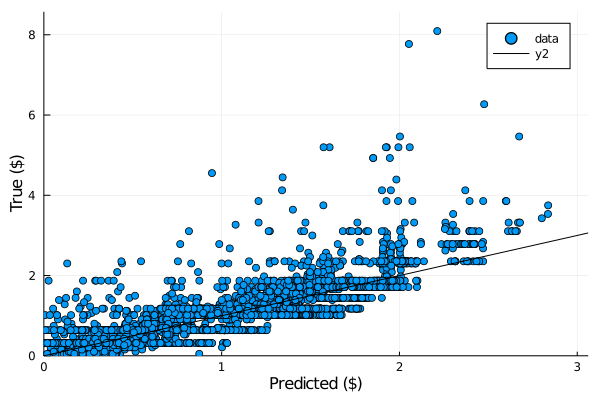

In [52]:
println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)

plot_pred_true(test_pred, test_y)

With color differentiate lyft and uber:

In [31]:
no_lyft = []
no_uber = []

for i in 1:size(Xtest)[1]
    if Xtest[i,18]==1
        append!(no_lyft,i)
    else
        append!(no_uber,i)
    end
end
        
X_lyft=Xtest[no_lyft,:]
X_uber=Xtest[no_uber,:]

test_pred_lyft = X_lyft*w #prediction of lyft
test_pred_uber = X_uber*w #prediction of uber

test_y_lyft = test_y[no_lyft,:] #true value of lyft
test_y_uber = test_y[no_uber,:] #true value of uber

65989×1 Array{Float32,2}:
 -0.7019385
 -0.7019385
  1.1212434
 -0.9164305
  1.0139973
 -1.0236765
 -1.0236765
  1.2821122
 -0.9700535
  0.53139037
 -1.1845455
  0.4241444
  0.79950535
  ⋮
 -0.5946925
 -0.75556153
  0.2096524
 -1.0236765
 -0.6483155
  0.10240641
  1.0139973
 -0.9164305
 -0.48744655
 -0.6483155
  2.4618182
  0.5850134

Together in one graph

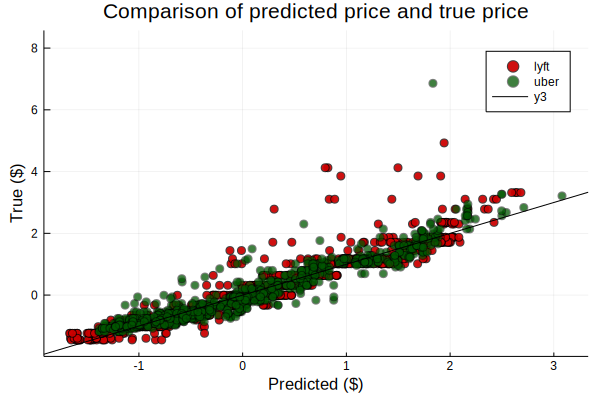

In [64]:
scatter(test_pred_lyft[1:1000], test_y_lyft[1:1000], label="lyft",color=:red,markeralpha=0.75)
scatter!(test_pred_uber[1:1000], test_y_uber[1:1000], label="uber",color=:green,markeralpha=0.5,
title="Comparison of predicted price and true price")

xlabel!("Predicted (\$)")
ylabel!("True (\$)")
x=test_pred
y=test_y
margin=.05
range_y = maximum(y) - minimum(y)
range_x = maximum(x) - minimum(x)
plotDiagonal(minimum(x)-margin*range_x, maximum(x)+margin*range_x)

ylims!((minimum(y)-margin*range_y,maximum(y)+margin*range_y))
xlims!((minimum(x)-margin*range_x,maximum(x)+margin*range_x))



In [45]:
# proxgrad
include("proxgrad.jl")
Pkg.add("LowRankModels")
Pkg.update("LowRankModels")
Pkg.status("LowRankModels")
using LowRankModels

loss = 1/n*QuadLoss()

# we form λ|| ⋅ ||^2 by multiplying the QuadReg() function by λ
λ = .1
reg = λ*QuadReg()

# minimize 1/n ||Xw - y||^2 + λ||w||^2
w = proxgrad(loss, reg, Xtrain, train_y, maxiters=5)

train_pred = Xtrain*w
test_pred = Xtest*w

train_MSE = MSE(train_y,train_pred)
test_MSE = MSE(test_y,test_pred)

println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)

plot_pred_true(test_pred, test_y)

  Resolving package versions...
Updating `~/.julia/environments/v1.5/Project.toml`
  [15d4e49f] ~ LowRankModels v1.1.1 `https://github.com/madeleineudell/LowRankModels.jl.git#master` ⇒ v1.1.1
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [15d4e49f] ~ LowRankModels v1.1.1 `https://github.com/madeleineudell/LowRankModels.jl.git#master` ⇒ v1.1.1
   Updating registry at `~/.julia/registries/General`
  Installed Formatting ───────────── v0.4.2
  Installed FiniteDiff ───────────── v2.7.2
  Installed NearestNeighbors ─────── v0.4.8
  Installed Tables ───────────────── v1.2.2
  Installed Contour ──────────────── v0.5.7
  Installed OffsetArrays ─────────── v1.4.1
  Installed GeometryBasics ───────── v0.3.4
  Installed Latexify ─────────────── v0.14.6
  Installed Compat ───────────────── v3.24.0
  Installed DiffResults ──────────── v1.0.3
  Installed ArrayInterface ───────── v2.14.4
  Installed PlotUtils ────────────── v1.0.8
  Installed Parsers ──────────────── v1.0.15
  Installed Posit

Status `~/.julia/environments/v1.5/Project.toml`
  [15d4e49f] LowRankModels v1.1.1


LoadError: MethodError: no method matching evaluate(::QuadLoss, ::Array{Float64,1}, ::Array{Float32,2})
Closest candidates are:
  evaluate(::Union{ClassificationLoss, DiffLoss}, ::Array{var"#s39",1} where var"#s39"<:Real, !Matched::AbstractArray{T,1} where T) at /Users/shelleyli/.julia/packages/LowRankModels/YZgma/src/losses.jl:633
  evaluate(::Loss, ::Array{var"#s39",1} where var"#s39"<:Real, !Matched::AbstractArray{T,1} where T) at /Users/shelleyli/.julia/packages/LowRankModels/YZgma/src/losses.jl:623
  evaluate(!Matched::NonNegOneReg, ::AbstractArray) at /Users/shelleyli/.julia/packages/LowRankModels/YZgma/src/regularizers.jl:129
  ...

Train MSE	0.12234467130570233
Test MSE 	0.12190599721771522


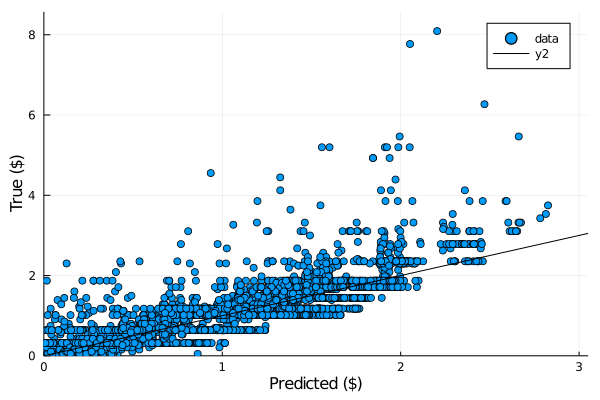

In [46]:
# svd

U,σ,V = svd(Xtrain)
# solve least squares problem to estimate w
w = V*diagm(σ.^(-1))*U'*train_y

train_pred = Xtrain*w
test_pred = Xtest*w

train_MSE = MSE(train_y,train_pred)
test_MSE = MSE(test_y,test_pred)

println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)

plot_pred_true(test_pred, test_y)

In [ ]:
# low rank model